In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


import dlvc.ops as ops

op = ops.chain([
    ops.type_cast(np.float32),
    ops.hwc2chw(),
    torch.from_numpy
])

ops_rev = ops.chain([
    ops.chw2hwc(),
    np.array,
    ops.type_cast(np.int64)
])

# 3. Convolutional Neural Networks

A CNN is a Neural Network which consits of Convolutional Layers and Fully Connected Layers.

![cnn](images/cnn_featureLearning.jpeg)

[Source](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

## Components of a CNN 

1. Convolutional Layers

2. Acitvation Function

3. Pooling Layers

4. Fully Connected Layers

Shape >>> (571, 700, 3)


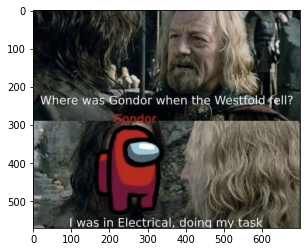

In [2]:
img = plt.imread("images/meme.jpeg")
print("Shape >>>", img.shape)
plt.imshow(img)
plt.show()

## 3.1 Convolutional Layer

Used to extract Features

![conv_layer](images/conv_layer.gif)

[Source](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

### Design Kernels

Could design Convolutional Kernel (first attempts) and then classify results.

#### Learn Kernel

Use backpropagation to learn the kernels according to data


### Hyperparameters

- <ins>Size of Kernel</ins> (Channels, Height, Width)

Always use all kernels to have all "color" information and standard is Height and Width 3 with small images

Therfore our first conv layer would have the shape (3, 3, 3)

- <ins>Stride</ins>

How far should the kernel jump each time - Standard is 1

- <ins>Padding</ins>

Should we pad (add values at each side) to the input so that the output has the same shape as input

In [3]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1)

conv_layer.weight     

Parameter containing:
tensor([[[[ 0.1232, -0.1058,  0.1259],
          [-0.0319,  0.1304,  0.0367],
          [-0.1223, -0.0213,  0.1436]],

         [[ 0.0451,  0.1045,  0.1248],
          [-0.1074, -0.1201,  0.0192],
          [-0.0345, -0.0517,  0.1070]],

         [[-0.1548,  0.1365, -0.0861],
          [ 0.0267, -0.1447, -0.1863],
          [-0.1456,  0.1727,  0.0768]]]], requires_grad=True)

In [4]:
img_conv = op(img)
img_conv.unsqueeze_(0)

print("Shape before feeding to the layer", img_conv.shape)
img_conv = conv_layer(img_conv)
print("Shape after feeding to the layer", img_conv.shape)

Shape before feeding to the layer torch.Size([1, 3, 571, 700])
Shape after feeding to the layer torch.Size([1, 1, 571, 700])


## 2.1 Activation Function

#### Rectified Linear Unit (ReLU)

Very simple Function which basicall only converts negative numbers to 0 and leaves positive values as the were.

#### Very Important! Why?

![relu](images/relu.png)

[Source](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)


In [5]:
def relu(value):
    return max(0, value)

print("ReLU(10) = {}".format(relu(10)))
print("ReLU(-2) = {}".format(relu(-2)))

ReLU(10) = 10
ReLU(-2) = 0


In [6]:
print("ReLU(10) = {}".format(nn.ReLU()(torch.tensor(10))))
print("ReLU(-2) = {}".format(nn.ReLU()(torch.tensor(-2))))

ReLU(10) = 10
ReLU(-2) = 0


## 3.3 Pooling Layers

Pooling Layers are used to decrease dimensionality and not loosing to much information in the process

There are different ways to use Pooling layers:

- Size of Pooling Kernels

- Stride of Kernel

- Method of Aggregation

#### Size

The Size in (height, width) - pool for every channel seperately

Shape >>> (285, 350, 3)


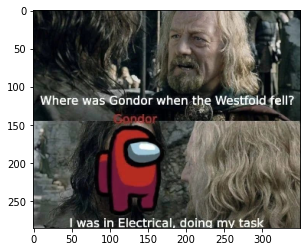

In [7]:
# define pooling layer
pool = nn.MaxPool2d(2, 2)
#convert to tensor and change layout
pooled_img = op(img)

# apply pooling
pooled_img = pool(pooled_img)

#revert changes
pooled_img = ops_rev(pooled_img)

print("Shape >>>", pooled_img.shape)
plt.imshow(pooled_img)
plt.show()


Shape >>> (285, 350, 3)


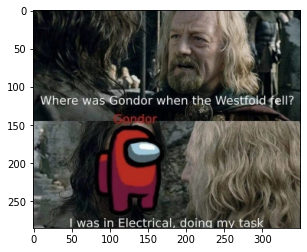

In [8]:
# define pooling layer
pool = nn.AvgPool2d(2, 2)
#convert to tensor and change layout
pooled_img = op(img)

# apply pooling
pooled_img = pool(pooled_img)

#revert changes
pooled_img = ops_rev(pooled_img)

print("Shape >>>", pooled_img.shape)
plt.imshow(pooled_img)
plt.show()


Average Pooling gives better results but is computationally more expensive!

## 3.4 Fully Connected Layers

Standard as in every other Neural Network! 

This Layer (could also be more layers) is used to classify the extractes features from the previous layers.

The last fully connected Layer should have an output size equal to the <ins>Number of classs</ins>

<ins>However</ins>:

We first need to change our output of the previous layers from (channel, height, width) into a 1-dimensional layer.

This will have the size of (channel * height * width) from the last layers


### Calculating Fully Connected Layer Size

1. Convolutional Layers

With Padding = 1 and Kernel-Size (channel, 3,3), we do not change the height and width of the image but we we could increase the channel size

2. ReLU

Does not change Size

3. Pooling

With Pooling Size of (2,2) we exactly half the height and width of the image and the channel size stays the same